In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib to display plots inline in the notebook
%matplotlib inline 

# Load the Titanic Dataset
# Using the confirmed file name 'train.csv'
try:
    df = pd.read_csv('train.csv')
    print("Dataset 'train.csv' loaded successfully!")
except FileNotFoundError:
    # If it was saved without the .csv extension in the file system but is a CSV format
    try:
        df = pd.read_csv('train')
        print("Dataset 'train' loaded successfully!")
    except Exception as e:
        print(f"Error loading file: {e}. Please confirm the exact file name and path.")
        
# Display the first few rows
print("\n--- First 5 Rows of the Data ---")
display(df.head()) # Using display() is often better in Jupyter for DataFrames

Dataset 'train.csv' loaded successfully!

--- First 5 Rows of the Data ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data types, non-null counts, and missing values
print("--- Data Information (df.info()) ---")
df.info()

# Get descriptive statistics for numerical columns
print("\n--- Numerical Summary (df.describe()) ---")
display(df.describe())

# Get descriptive statistics for categorical columns
print("\n--- Categorical Summary (df.describe(include='object')) ---")
display(df.describe(include='object'))

--- Data Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Numerical Summary (df.describe()) ---


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



--- Categorical Summary (df.describe(include='object')) ---


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [4]:
# Check the distribution of the target variable
print("--- Survival Counts ---")
print(df['Survived'].value_counts())
print("\n--- Passenger Class Counts (Pclass) ---")
print(df['Pclass'].value_counts())
print("\n--- Embarked Port Frequencies ---")
print(df['Embarked'].value_counts())

--- Survival Counts ---
Survived
0    549
1    342
Name: count, dtype: int64

--- Passenger Class Counts (Pclass) ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

--- Embarked Port Frequencies ---
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [5]:
# Impute the 2 missing 'Embarked' values with the mode ('S')
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

# Verify the missing values are gone
print("Missing values after Embarked imputation:")
print(df.isnull().sum())

Missing values after Embarked imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


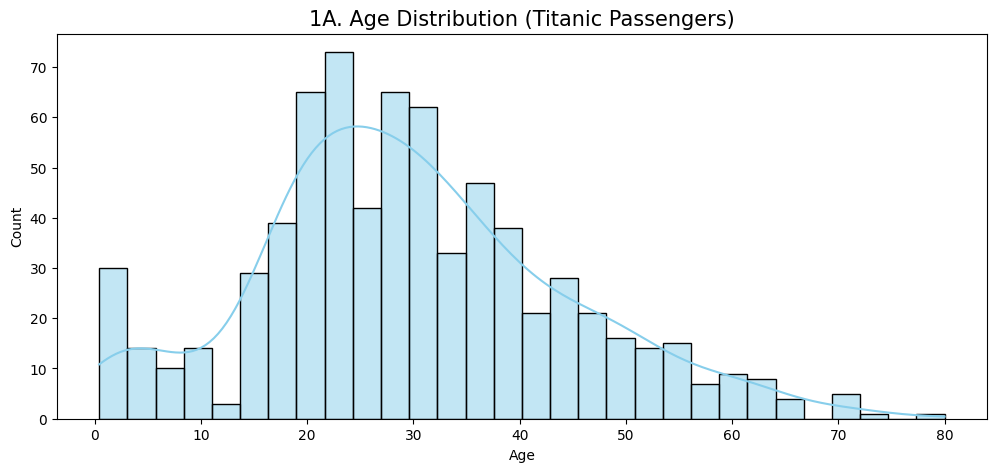

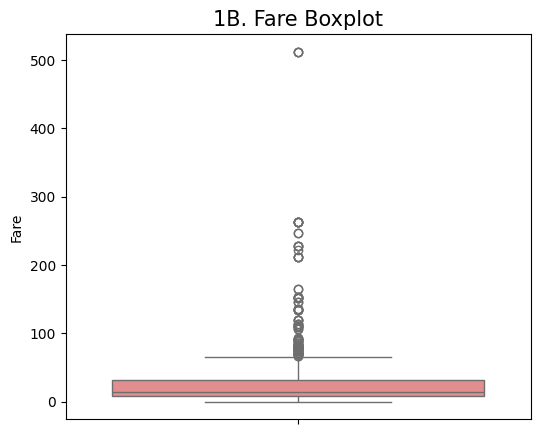

In [6]:
# 1. Age Distribution (Histogram)
plt.figure(figsize=(12, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('1A. Age Distribution (Titanic Passengers)', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Fare Boxplot (Outlier Check)
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Fare'], color='lightcoral')
plt.title('1B. Fare Boxplot', fontsize=15)
plt.ylabel('Fare')
plt.show()

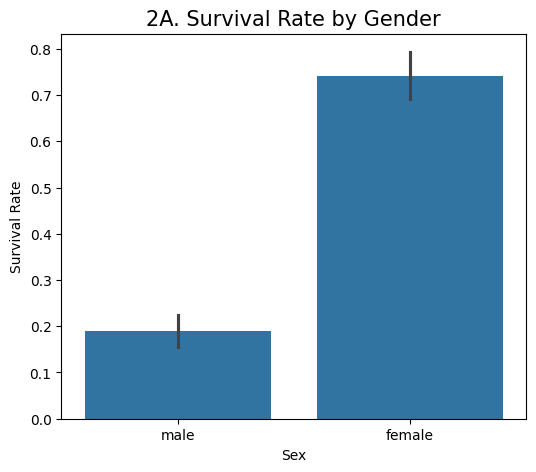

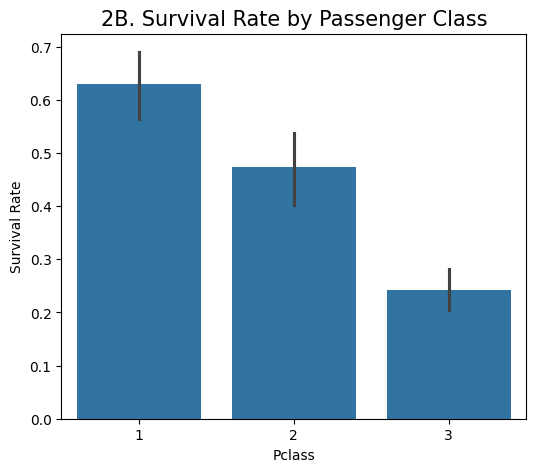

In [7]:
# Survival Rate by Sex (Bar Plot)
plt.figure(figsize=(6, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('2A. Survival Rate by Gender', fontsize=15)
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Pclass (Bar Plot)
plt.figure(figsize=(6, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('2B. Survival Rate by Passenger Class', fontsize=15)
plt.ylabel('Survival Rate')
plt.show()

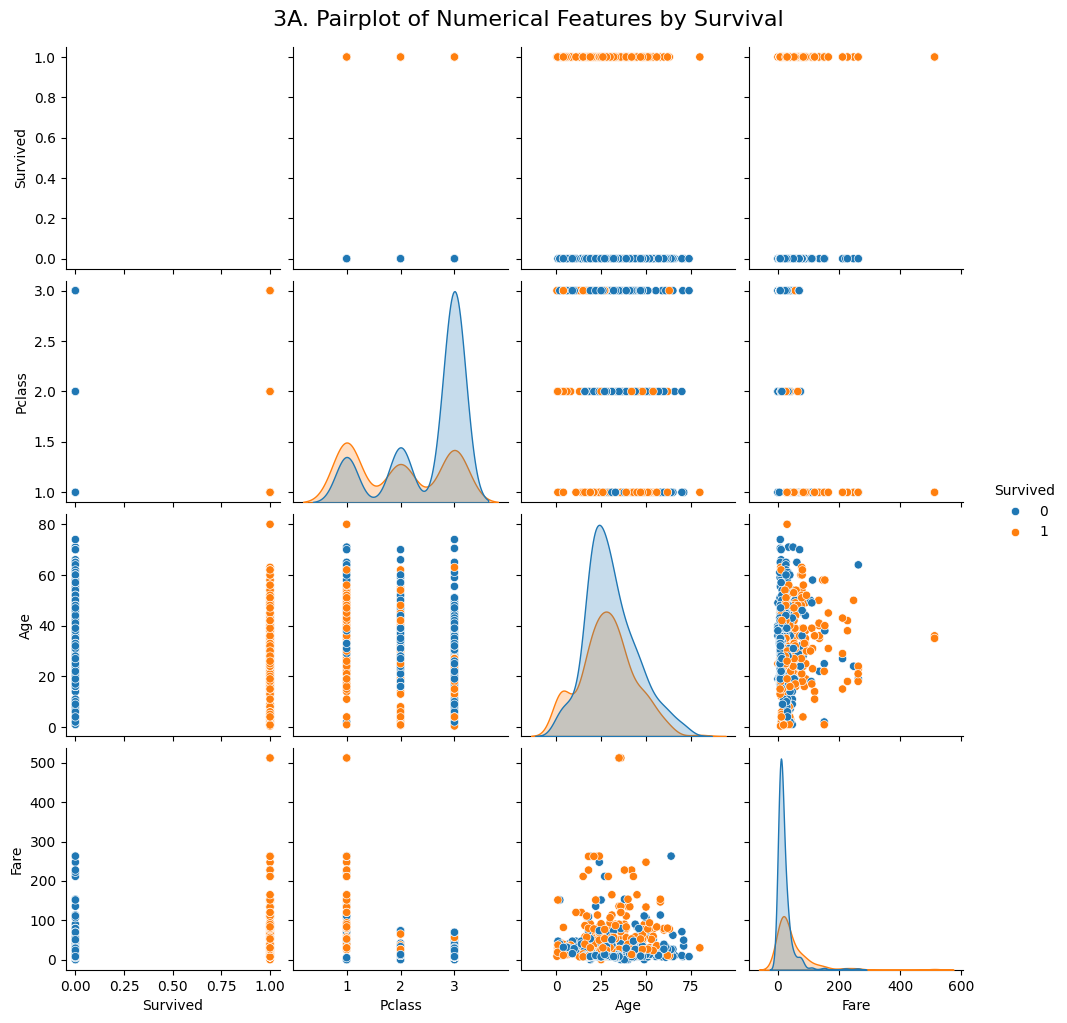

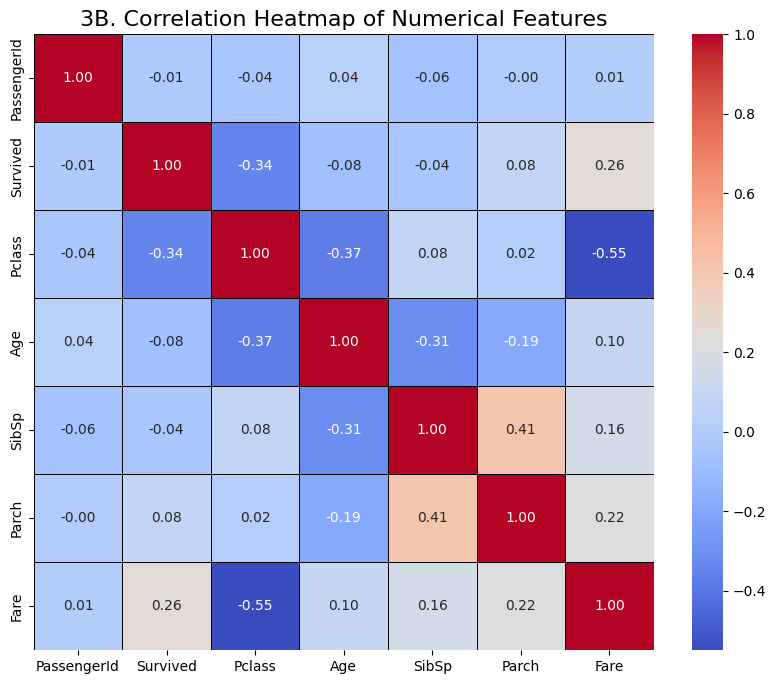

In [8]:
# 3. Pairplot: Visualize relationships between all key numerical variables
# 'hue' colors the scatterplots based on the Survived outcome
sns.pairplot(df, vars=['Survived', 'Pclass', 'Age', 'Fare'], hue='Survived', diag_kind='kde')
plt.suptitle('3A. Pairplot of Numerical Features by Survival', y=1.02, fontsize=16)
plt.show()


# 4. Heatmap: Visualize correlation matrix
# Select only numerical features for the correlation matrix
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
# Annot=True shows the correlation value on the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('3B. Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()